<a href="https://colab.research.google.com/github/Daniyal6124/EDA/blob/main/EDA_V.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("/content/realistic_e_commerce_sales_data.csv")

print(data.head())
print(data.info())

  Customer ID  Gender Region   Age Product Name     Category  Unit Price  \
0    CUST0268    Male  North   NaN      Monitor  Electronics       300.0   
1    CUST0046    Male   West  22.0   Headphones  Accessories       100.0   
2    CUST0169  Female  South  54.0      Monitor  Electronics       300.0   
3    CUST0002    Male  North  23.0   Headphones  Accessories       100.0   
4    CUST0173  Female  South   NaN       Laptop  Electronics      1500.0   

   Quantity  Total Price  Shipping Fee Shipping Status  Order Date  
0         5         1500         13.31        Returned  2023-12-08  
1         2          200          6.93      In Transit  2023-04-09  
2         1          300         11.31        Returned  2023-08-28  
3         5          500         12.22       Delivered  2023-01-18  
4         3         4500          5.40       Delivered  2023-01-19  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column           N

Attributes

In [ ]:
print(data.columns)
print(data.shape)
print(data.columns)
print(data.dtypes)
print(data.values)
print(data.T)

Index(['Customer ID', 'Gender', 'Region', 'Age', 'Product Name', 'Category',
       'Unit Price', 'Quantity', 'Total Price', 'Shipping Fee',
       'Shipping Status', 'Order Date'],
      dtype='object')
(1000, 12)
Index(['Customer ID', 'Gender', 'Region', 'Age', 'Product Name', 'Category',
       'Unit Price', 'Quantity', 'Total Price', 'Shipping Fee',
       'Shipping Status', 'Order Date'],
      dtype='object')
Customer ID         object
Gender              object
Region              object
Age                float64
Product Name        object
Category            object
Unit Price         float64
Quantity             int64
Total Price          int64
Shipping Fee       float64
Shipping Status     object
Order Date          object
dtype: object
[['CUST0268' 'Male' 'North' ... 13.31 'Returned' '2023-12-08']
 ['CUST0046' 'Male' 'West' ... 6.93 'In Transit' '2023-04-09']
 ['CUST0169' 'Female' 'South' ... 11.31 'Returned' '2023-08-28']
 ...
 ['CUST0055' 'Female' 'North' ... 19.35 'Delive

Handling Missing Values and Generating Invoice Number

In [ ]:
data.dropna(inplace=True)       #removed missing values(NaN- Not a Number)
data['Age'] = data['Age'].astype(int)   #converted Age from float to int

# Invoice number based on customer ID and purchase order
data['InvoiceNo'] = data.groupby('Customer ID').cumcount() + 1      #cumcount() counts occurrences of each Customer ID.
print(data)

    Customer ID  Gender Region  Age Product Name     Category  Unit Price  \
1      CUST0046    Male   West   22   Headphones  Accessories       100.0   
2      CUST0169  Female  South   54      Monitor  Electronics       300.0   
3      CUST0002    Male  North   23   Headphones  Accessories       100.0   
5      CUST0147    Male  North   64   Smartwatch    Wearables       200.0   
6      CUST0262    Male   East   27   Smartwatch    Wearables       200.0   
..          ...     ...    ...  ...          ...          ...         ...   
993    CUST0200  Female  North   68   Smartphone  Electronics       800.0   
994    CUST0079    Male   West   26   Smartwatch    Wearables       200.0   
995    CUST0201  Female  South   49   Headphones  Accessories       100.0   
996    CUST0133    Male   East   47       Laptop  Electronics      1500.0   
998    CUST0023  Female  South   29       Laptop  Electronics      1500.0   

     Quantity  Total Price  Shipping Fee Shipping Status  Order Date  \
1  

Basic EDA

In [ ]:
def perform_eda(df):
    print("\n Descriptive Statistics:\n")
    print(df.describe(include='all'))

    # Correlation
    num_df = df.select_dtypes(include=np.number)
    if not num_df.empty:
        print("\n Correlation Matrix:\n")
        print(num_df.corr())
perform_eda(data)




 Descriptive Statistics:

       Customer ID Gender Region         Age Product Name     Category  \
count          810    810    810  810.000000          810          810   
unique         280      2      4         NaN            7            3   
top       CUST0204   Male   West         NaN      Monitor  Electronics   
freq             9    427    219         NaN          155          386   
mean           NaN    NaN    NaN   46.634568          NaN          NaN   
std            NaN    NaN    NaN   15.072213          NaN          NaN   
min            NaN    NaN    NaN   18.000000          NaN          NaN   
25%            NaN    NaN    NaN   35.000000          NaN          NaN   
50%            NaN    NaN    NaN   49.000000          NaN          NaN   
75%            NaN    NaN    NaN   59.000000          NaN          NaN   
max            NaN    NaN    NaN   69.000000          NaN          NaN   

         Unit Price    Quantity  Total Price  Shipping Fee Shipping Status  \
count 

Visualizations:

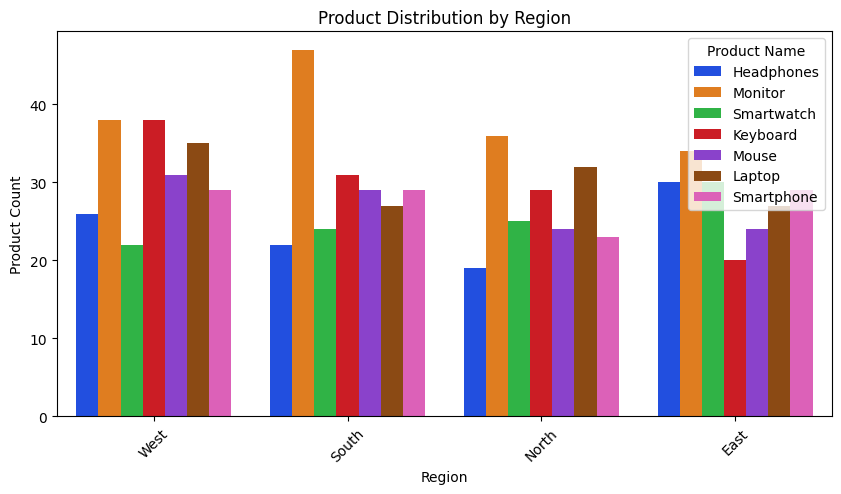

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='Region', hue='Product Name', palette="bright")  # Count products per region
plt.xlabel("Region")
plt.ylabel("Product Count")
plt.title("Product Distribution by Region")
plt.xticks(rotation=45)
plt.show()

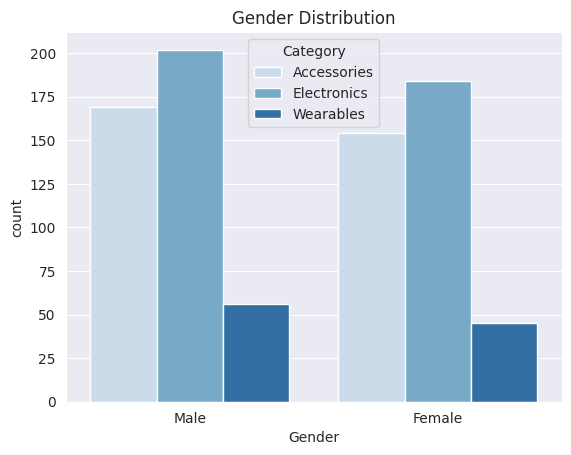

In [ ]:
sns.set_style("darkgrid")
sns.countplot(data=data, x='Gender',hue='Category', palette="Blues")
plt.title("Gender Distribution")
plt.show()

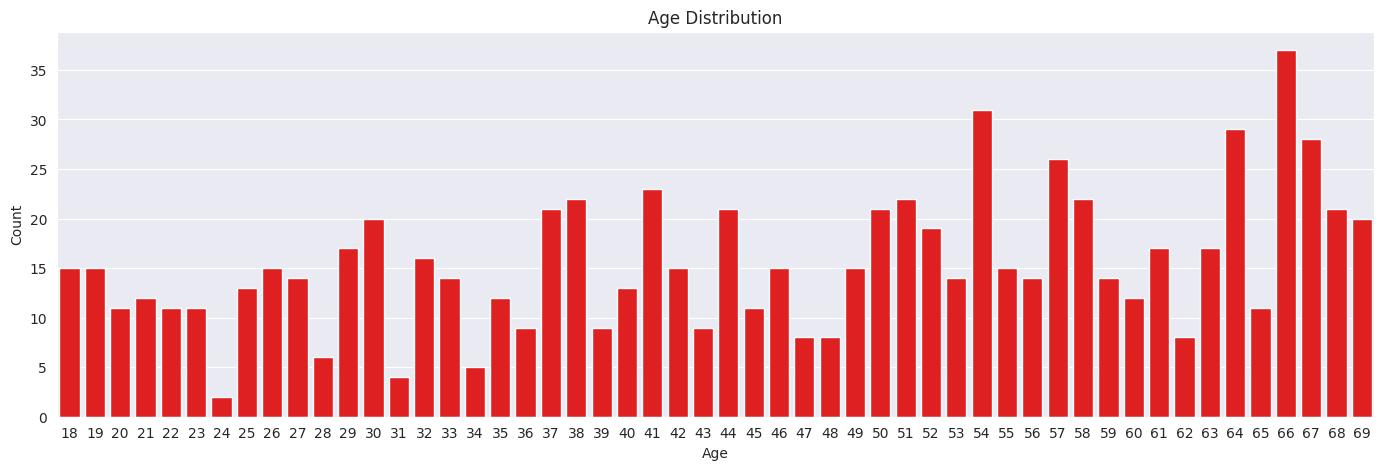

In [ ]:
age_counts = data['Age'].value_counts()
plt.figure(figsize=(17, 5))
sns.barplot(x=age_counts.index, y=age_counts.values,color='red')
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution")
plt.show()

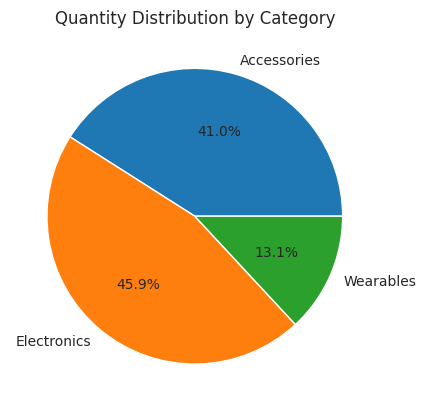

In [ ]:
customer_data = data.groupby('Category').agg({
    'Quantity': 'sum',
    'InvoiceNo': 'count',  # Number of purchases
    'Order Date': 'max'   # Last purchase date
}).reset_index()

data['Quantity'] = pd.to_numeric(data['Quantity'], errors='coerce')
category_quantity = data.groupby('Category')['Quantity'].sum()
plt.pie(category_quantity, labels=category_quantity.index, autopct='%1.1f%%')
plt.title("Quantity Distribution by Category")
plt.show()

The monitor has performed well in terms of sales across all regions.
Headphones have had the fewest units sold in the North region.
Electronics is the category that performed well among both male and female customers, whereas Wearables did not perform well for either gender.
Age group of 66 has the highest number of purchases. Whereas, 24 is the age group which made the least purchases
According to the pie chart, wearables had the lowest percentage of sales at 13.1%
